# <center>Housing Data</center>

### Linear Regression with one variable

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model

In [172]:
path = 'Datasets_ML/restaurants.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [173]:
df = data[['Population','Profit']]
#df = df/100000
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [174]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


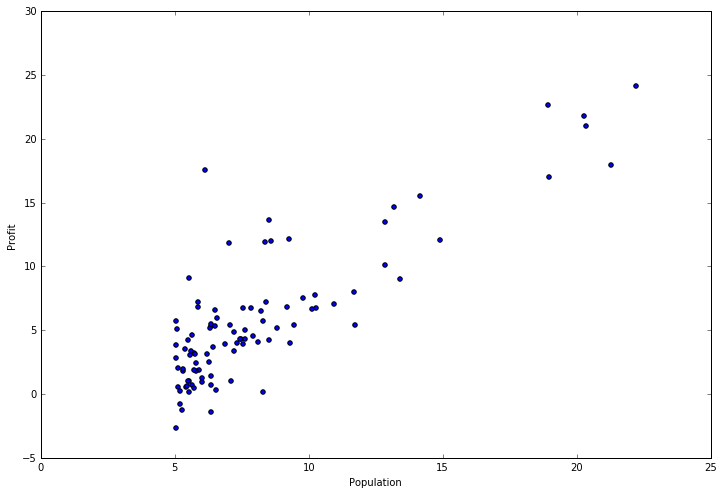

In [175]:
df.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))


#### Implementing Linear Regression using gradient descent to minimize the cost function

In [176]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [177]:
df.insert(0, 'Ones', 1)


In [178]:
df.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [181]:
# set X (training data) and y (target variable)


X = df[['Ones', 'Population']]
y = df[['Profit']]

In [182]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [183]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [184]:
X = np.matrix(X.values)
y = np.matrix(y.values)

In [185]:
theta = np.matrix(np.array([0,0]))
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [186]:
error = computeCost(X,y,theta)
error

32.072733877455676

In [187]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [188]:
alpha = 0.01
iters = 1000

In [189]:
g, cost = gradientDescent(X, y, theta, alpha, iters)

In [190]:
computeCost(X, y, g)

4.5159555030789118

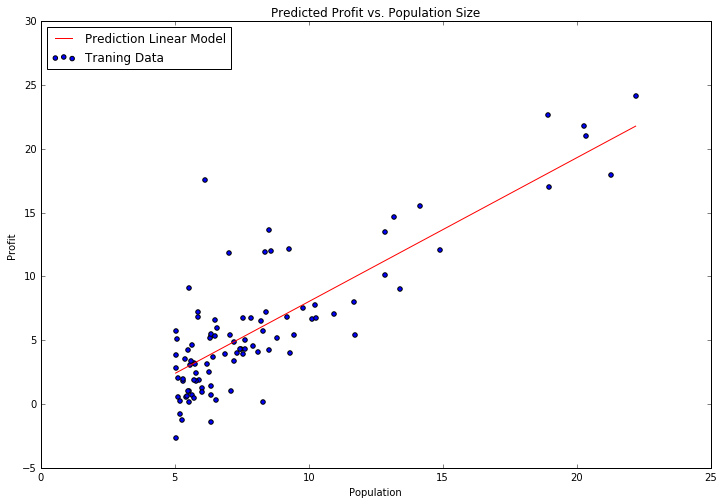

In [191]:
x = np.linspace(df.Population.min(), df.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction Linear Model')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

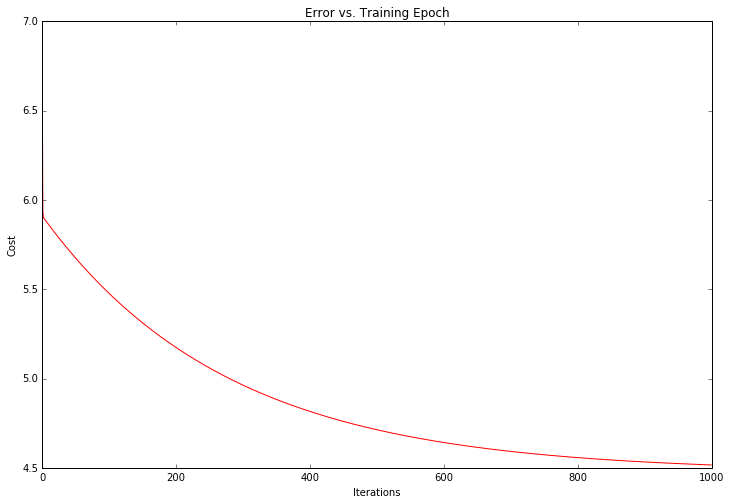

In [192]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### Linear Regression with multiple variables

In [193]:
path = 'Datasets_ML/restaurants2.txt'
df2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
df2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [194]:
df2 = (df2 - df2.mean()) / df2.std()
df2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [195]:
# add ones column
df2.insert(0, 'Ones', 1)


In [196]:
# set X (training data) and y (target variable)
cols = df2.shape[1]
X2 = df2.iloc[:,0:cols-1]
y2 = df2.iloc[:,cols-1:cols]

In [197]:
# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

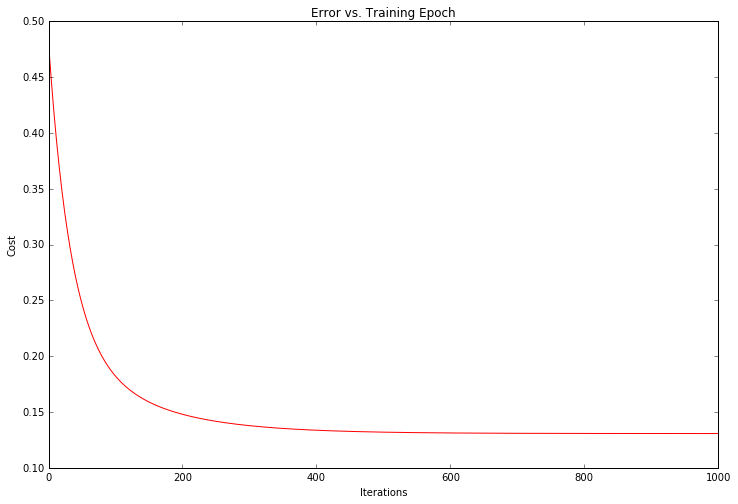

In [198]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### Implementing Linear Regression Model using scikit-learn linear regression function

In [199]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

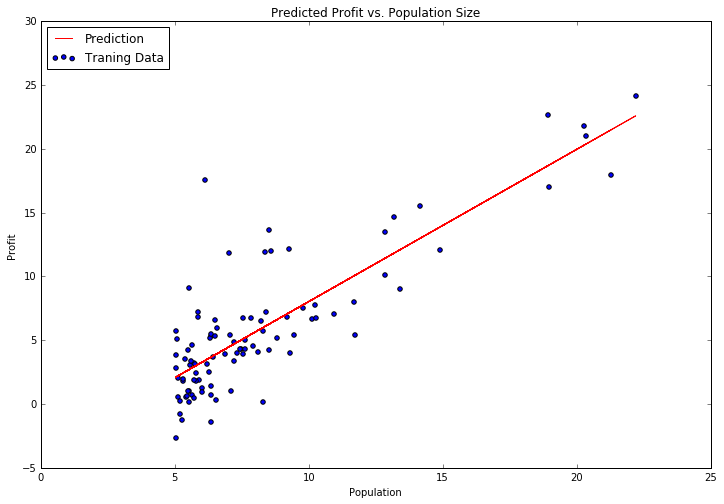

In [200]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')